## Notes
### Change in Device:
* Chategory Id ---> Categories
* Zone Id ----> Zones
### Change in sub category
* sub Category Name ----> subCategoryName
* sub Category Description ----> subCategoryDescription

In [1]:
# Load libraries
import pandas as pd #data processing CSV files I/O (pd.read_csv)
import numpy as np # linear algebra
import os

#Missingno is a Python library that provides the ability to understand the distribution of missing values through informative
# visualizations. The visualizations can be in the form of heat maps or bar charts
import missingno as msmo 

In [2]:
# get the path of the curren working directory
presentWorkingDirectory = os.getcwd()

In [3]:
# read the sheet
dtSetZone = pd.read_excel(presentWorkingDirectory+"\Dataset\Connected Office Dataset.xlsx",sheet_name=0)
dtSetDevice = pd.read_excel(presentWorkingDirectory+"\Dataset\Connected Office Dataset.xlsx",sheet_name=1)
dtSetCategory = pd.read_excel(presentWorkingDirectory+"\Dataset\Connected Office Dataset.xlsx",sheet_name=2)
dtSetSubCategory = pd.read_excel(presentWorkingDirectory+"\Dataset\Connected Office Dataset.xlsx",sheet_name=3)
full_ds = pd.concat([dtSetZone,dtSetDevice,dtSetCategory,dtSetSubCategory],ignore_index=True)

<AxesSubplot:>

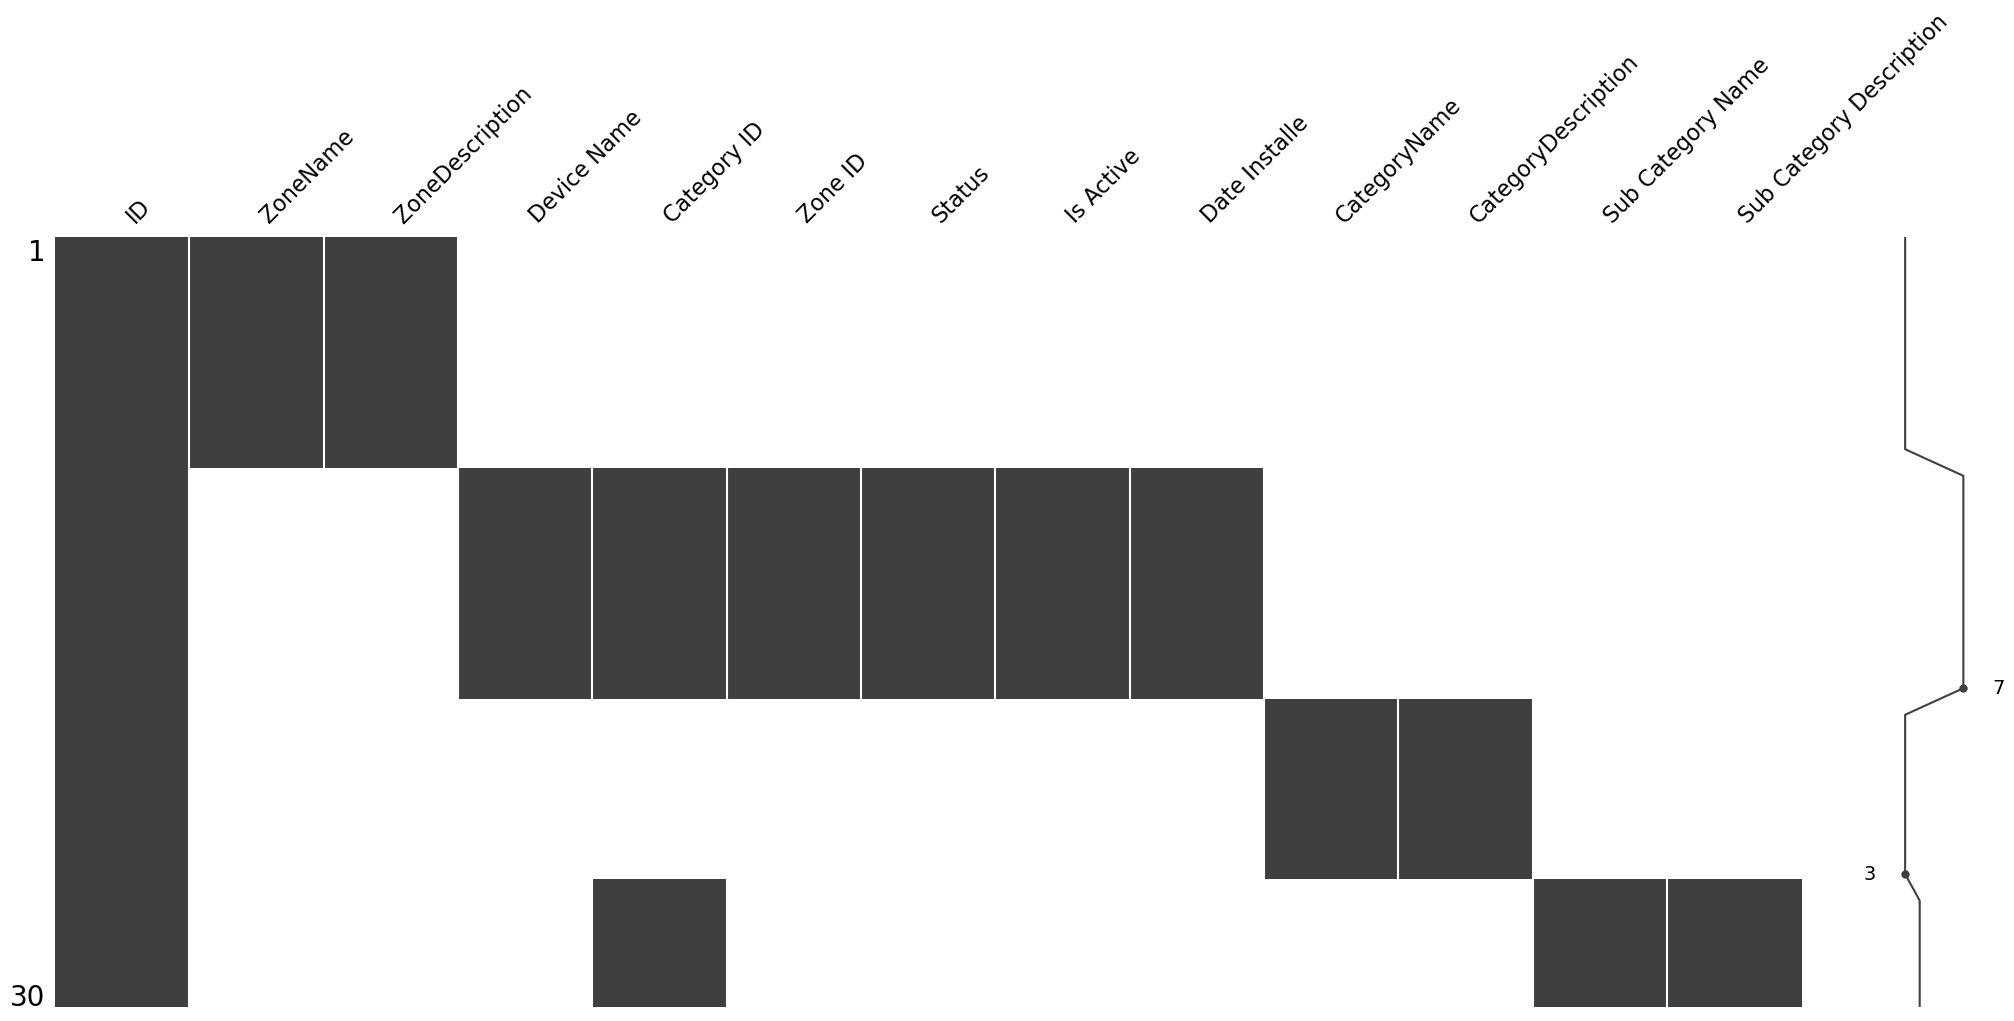

In [4]:
# check missing values
# Visualize missing values as a matrix
msmo.matrix(full_ds)

In [5]:
# Remove duplicate
dtSetZone.drop_duplicates()
dtSetDevice.drop_duplicates()
dtSetCategory.drop_duplicates()
dtSetSubCategory.drop_duplicates()

,ID,Category ID,Sub Category Name,Sub Category Description
0,SC01,C01,Camera,Visual monitoring tool
1,SC02,C01,Temperature Sensor,Measuring air temp
2,SC03,C01,Motion Sensor,Monitoring for motion to trigger action
3,SC04,C01,Access Control,Managing access for people entering and exitin...
4,SC05,C01,Speed Sensor,Measuring speed of moving object


In [6]:
#Rename column devices
dfdevice = []
dfdevice.append(dtSetDevice)
devices = pd.concat(dfdevice)

new_name = {'Device Name':'Devices','Category ID': 'Categories', 'Zone ID': 'Zones', 'Date Installe':'Date Installed'}
devices.rename(columns = new_name, inplace=True)

# add the Year coloumn from date 
devices['Year']= devices['Date Installed'].dt.year

# add a new column for online if true and offline if false
devices.loc[devices['Is Active'] == True, "Online_Offline" ] = 'Online'
devices.loc[devices['Is Active'] == False, "Online_Offline" ] = 'Offline'

In [7]:
devices

,ID,Devices,Categories,Zones,Status,Is Active,Date Installed,Year,Online_Offline
0,D01,Front-door Camera,Camera,Terrazzo,In Operation,True,2020-01-25,2020,Online
1,D02,Boiler Temp,Temperature Sensor,Boilermaker Room,Broken,True,2021-02-02,2021,Online
2,D03,Speed Testing,Speed Sensor,Safety Office,In Operation,True,2021-12-11,2021,Online
3,D04,Entry Access,Access Control,Stucco Mason Building,In Operation,True,2022-03-21,2022,Online
4,D05,Exit Access,Access Control,Stucco Mason Building,Stopped,False,2022-03-21,2022,Offline
5,D06,Light Activation,Motion Sensor,Labor Office,Broken,False,2021-05-17,2021,Offline
6,D07,Front-door Camera,Camera,Environmental Office,In Operation,True,2021-08-01,2021,Online
7,D08,Aircon Activation,Motion Sensor,Tile Setting Bench,Maintenance,False,2021-08-26,2021,Offline
8,D09,Assembly Temp,Temperature Sensor,Linemen Assembly,Maintenance,False,2022-01-23,2022,Offline


In [8]:
# check data types
devices.dtypes

ID                        object
Devices                   object
Categories                object
Zones                     object
Status                    object
Is Active                   bool
Date Installed    datetime64[ns]
Year                       int64
Online_Offline            object
dtype: object

In [10]:
#Rename column devices
dfsubCategory = []
dfsubCategory.append(dtSetSubCategory)
subCategory = pd.concat(dfsubCategory)

new_name = {'Sub Category Name':'SubCategoryName','Sub Category Description': 'SubCategoryDescription'}
subCategory.rename(columns = new_name, inplace=True)


# changed Sub_Category values
new_values = pd.Series(['C05','C05'], name='Category ID', index=[0,3])
subCategory.update(new_values)

subCategory

,ID,Category ID,SubCategoryName,SubCategoryDescription
0,SC01,C05,Camera,Visual monitoring tool
1,SC02,C01,Temperature Sensor,Measuring air temp
2,SC03,C01,Motion Sensor,Monitoring for motion to trigger action
3,SC04,C05,Access Control,Managing access for people entering and exitin...
4,SC05,C01,Speed Sensor,Measuring speed of moving object


In [11]:
# check data types
subCategory.dtypes

ID                        object
Category ID               object
SubCategoryName           object
SubCategoryDescription    object
dtype: object

In [12]:
# check data types
dtSetZone.dtypes

ID                 object
ZoneName           object
ZoneDescription    object
dtype: object

In [13]:
# check data types
dtSetCategory.dtypes

ID                     object
CategoryName           object
CategoryDescription    object
dtype: object

In [38]:
# create new and updated sheets
dtSetZone.to_excel(presentWorkingDirectory+'\Dataset\zones.xlsx')
dtSetCategory.to_excel(presentWorkingDirectory+'\Dataset\categories.xlsx')
subCategory.to_excel(presentWorkingDirectory+'\Dataset\subCategories.xlsx')
devices.to_excel(presentWorkingDirectory+'\Dataset\devices.xlsx')